In [10]:
import os
import json
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_ollama import OllamaEmbeddings  # Ollama embeddings class

# Directory containing JSON files
DATA_DIR = "./datasets/microlabs_usa"

# Read JSON files and convert to LangChain documents
def load_json_to_documents(data_dir):
    docs = []
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".json"):
            file_path = os.path.join(data_dir, file_name)
            with open(file_path, "r") as f:
                json_data = json.load(f)
                drug_name = file_name.replace(".json", "")  # Extract drug name from filename
                
                # Iterate over the keys in the JSON
                for key, value in json_data.items():
                    # Combine drug name, key name, and content
                    chunk_content = f"Drug Name: {drug_name}\nKey: {key}\nContent:\n{value}"
                    metadata = {"source": file_name, "drug_name": drug_name, "key": key}
                    docs.append(Document(page_content=chunk_content, metadata=metadata))
    return docs

# Load JSON files as documents
docs_list = load_json_to_documents(DATA_DIR)

# Initialize the text splitter
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=800, chunk_overlap=150
)

# Split documents into smaller chunks
doc_splits = text_splitter.split_documents(docs_list)



In [11]:
len(doc_splits)

19875

In [18]:
embd = OllamaEmbeddings(model="nomic-embed-text")  # You can specify a model like llama-2-7b-chat

# Add to Chroma vectorstore
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=embd,
    persist_directory="./db2"
)

# Create retriever for question-answering tasks
retriever = vectorstore.as_retriever()

# Example usage of retriever
query = "What are the uses of Amoxicillin?"
results = retriever.get_relevant_documents(query)
print("\n--- Relevant Documents ---\n")
for result in results:
    print(f"Content:\n{result.page_content}")
    print(f"Metadata: {result.metadata}")
    print("---")


KeyboardInterrupt: 

In [ ]:
import os
import json
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_ollama import OllamaEmbeddings

# Directory containing JSON files
DATA_DIR = "./datasets/microlabs_usa"
PERSIST_DIR = "./db4"  # Persistent store for ChromaDB

# Batch size for processing documents
BATCH_SIZE = 50
TOP_N = 10

# Read JSON files and convert to LangChain documents
def load_top_n_json_to_documents(data_dir, top_n):
    docs = []
    # Get all JSON files and sort them alphabetically
    json_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".json")])[:top_n]
    
    for file_name in json_files:
        file_path = os.path.join(data_dir, file_name)
        with open(file_path, "r") as f:
            json_data = json.load(f)
            drug_name = file_name.replace(".json", "")  # Extract drug name from filename
            
            # Iterate over the keys in the JSON
            for key, value in json_data.items():
                # Combine drug name, key name, and content
                chunk_content = f"Drug Name: {drug_name}\nKey: {key}\nContent:\n{value}"
                metadata = {"source": file_name, "drug_name": drug_name, "key": key}
                docs.append(Document(page_content=chunk_content, metadata=metadata))
    return docs

# Load top N JSON files as documents
docs_list = load_top_n_json_to_documents(DATA_DIR, TOP_N)


# Initialize the text splitter
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=800, chunk_overlap=150
)

# Split documents into smaller chunks
all_chunks = text_splitter.split_documents(docs_list)

# Batch processing: split all chunks into batches of BATCH_SIZE
def chunk_batches(chunks, batch_size):
    for i in range(0, len(chunks), batch_size):
        yield chunks[i:i + batch_size]

# Initialize Ollama embeddings
embd = OllamaEmbeddings(model="nomic-embed-text")  # Specify the embedding model

# Process each batch of 100 documents

for batch_num, batch in enumerate(chunk_batches(all_chunks, BATCH_SIZE)):
    print(f"Processing batch {batch_num + 1}")
    if os.path.exists(PERSIST_DIR):
        # Load existing database
        vectorstore = Chroma(persist_directory=PERSIST_DIR, embedding_function=embd)
    else:
        # Create a new database for the first batch'ArithmeticError
        print('bleh')
        vectorstore = Chroma(persist_directory=PERSIST_DIR, embedding_function=embd)

    # Add batch to the vectorstore
    vectorstore.add_documents(batch)
    vectorstore.persist()
    print(f"Batch {batch_num + 1} persisted successfully.")

# Create retriever for question-answering tasks



Processing batch 1
bleh


/var/folders/9b/zk85r2w17rnb_wswllkymxm80000gp/T/ipykernel_87858/2720776962.py:70: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


Batch 1 persisted successfully.
Processing batch 2
Batch 2 persisted successfully.
Processing batch 3
Batch 3 persisted successfully.
Processing batch 4
Batch 4 persisted successfully.
Processing batch 5
Batch 5 persisted successfully.
Processing batch 6
Batch 6 persisted successfully.
Processing batch 7
Batch 7 persisted successfully.
Processing batch 8
Batch 8 persisted successfully.
Processing batch 9
Batch 9 persisted successfully.
Processing batch 10
Batch 10 persisted successfully.
Processing batch 11
Batch 11 persisted successfully.
Processing batch 12
Batch 12 persisted successfully.
Processing batch 13
Batch 13 persisted successfully.
Processing batch 14
Batch 14 persisted successfully.
Processing batch 15
Batch 15 persisted successfully.
Processing batch 16
Batch 16 persisted successfully.
Processing batch 17
Batch 17 persisted successfully.
Processing batch 18
Batch 18 persisted successfully.
Processing batch 19
Batch 19 persisted successfully.
Processing batch 20
Batch 20 p

TypeError: Chroma.__init__() got an unexpected keyword argument 'embedding'

In [166]:
import os
import json
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_ollama import OllamaEmbeddings
PERSIST_DIR = "./db4"
embd = OllamaEmbeddings(model="nomic-embed-text") 
vectorstore = Chroma(persist_directory=PERSIST_DIR, embedding_function=embd)
retriever = vectorstore.as_retriever()

# Example usage of retriever
query = "What are the uses of Amoxicillin?"
results = retriever.get_relevant_documents(query)
print("\n--- Relevant Documents ---\n")
for result in results:
    print(f"Content:\n{result.page_content}")
    # print(f"Metadata: {result.metadata}")
    print("---")


--- Relevant Documents ---

Content:
Drug Name: Amoxicillin and Clavulanate Potassium for Oral Suspension, USP
Key: 1 INDICATIONS AND USAGE
Content:
Amoxicillin and clavulanate potassium for oral suspension is indicated for the treatment of infections in adults and pediatric patients, due to susceptible isolates of the designated bacteria in the conditions listed below:Lower Respiratory Tract Infections- caused by beta‑lactamase‑producing isolates ofHaemophilus influenzaeandMoraxella catarrhalis.Acute Bacterial Otitis Media- caused by beta‑lactamase‑producing isolates ofH. influenzaeandM. catarrhalis.Sinusitis- caused by beta‑lactamase‑producing isolates ofH. influenzaeandM. catarrhalis.Skin and Skin Structure Infections- caused by beta‑lactamase‑producing isolates ofStaphylococcus aureus,Escherichia coli,andKlebsiellaspecies.Urinary Tract Infections- caused by beta‑lactamase‑producing isolates ofE. coli,Klebsiellaspecies, andEnterobacterspecies.Limitations of UseWhen susceptibility t

In [167]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "drugs",
    "Search and return information about drugs",
)

tools = [retriever_tool]

In [6]:
from langgraph.graph import MessagesState
# The agent state is the input to each node in the graph
class AgentState(MessagesState):
    # The 'next' field indicates where to route to next
    next: str

In [7]:
# Load environment variables
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

load_dotenv("./secrets/secrets.env")
groq_api_key = os.getenv('GROQ_API_KEY')
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-3b-preview")



In [57]:
from langchain_ollama import ChatOllama
llm2 = ChatOllama(model="llama3.1")

In [58]:
from ollama_functions import OllamaFunctions
llm = OllamaFunctions(model="llama3.1")

In [156]:
from dotenv import load_dotenv
load_dotenv(override=True)

True

In [168]:
from typing import Literal
from typing_extensions import TypedDict


members = ["doctor", "description","warning"]
# Our team supervisor is an LLM node. It just picks the next agent to process
# and decides when the work is completed
options = members + ["FINISH"]

system_prompt = (
    "You are a supervisor tasked with managing a conversation between the"
    f" following workers: {members}. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
)


from pydantic import BaseModel, Field
from typing import Literal

class Router(BaseModel):
    """Worker to route to next. If no workers are needed, route to FINISH."""

    next: Literal["doctor", "description", "warning", "FINISH"] = Field(
        ...,
        description="The name of the next worker. Use 'FINISH' if no workers are needed.",
    )


def supervisor_node(state: AgentState) -> AgentState:
    try:
        messages = [
        {"role": "system", "content": system_prompt},
    ] + state["messages"]
        response = llm.with_structured_output(Router).invoke(messages)
        print(response)
        next_ = response.next
        if next_ == "FINISH":
            next_ = END

        return {"next": next_}
    except:
        return {"next":END}


In [169]:
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import create_react_agent


description_agent = create_react_agent(
    llm, tools=[retriever_tool], state_modifier="You are a drug specialist which can give descriptions of a particular drug")


def description_node(state: AgentState) -> AgentState:
    result = description_agent.invoke(state)
    return {
        "messages": [
            HumanMessage(content=result["messages"][-1].content, name="descriptor")
        ]
    }


# NOTE: THIS PERFORMS ARBITRARY CODE EXECUTION, WHICH CAN BE UNSAFE WHEN NOT SANDBOXED
doctor_agent = create_react_agent(llm, tools=[retriever_tool],state_modifier="You are a doctor who has a knowledge base of all the drugs hwo to use it and for what disease to use it for")


def doctor_node(state: AgentState) -> AgentState:
    result = doctor_agent.invoke(state)
    return {
        "messages": [HumanMessage(content=result["messages"][-1].content, name="doctor")]
    }
warning_agent =  create_react_agent(llm, tools=[retriever_tool],state_modifier = "You are a warnnign agent who know what types of side effects each drug has along with dos and donts of drug")

def warning_node(state: AgentState) -> AgentState:
    result = warning_agent.invoke(state)
    return {
        "messages": [HumanMessage(content=result["messages"][-1].content, name="warning")]
    }


builder = StateGraph(AgentState)
builder.add_edge(START, "supervisor")
builder.add_node("supervisor", supervisor_node)
builder.add_node("description", description_agent)
builder.add_node("doctor", doctor_agent)
builder.add_node("warning", warning_agent)


In [170]:
for member in members:
    # We want our workers to ALWAYS "report back" to the supervisor when done
    builder.add_edge(member, "supervisor")

# The supervisor populates the "next" field in the graph state
# which routes to a node or finishes
builder.add_conditional_edges("supervisor", lambda state: state["next"])
# Finally, add entrypoint
builder.add_edge(START, "supervisor")

graph = builder.compile()

In [171]:
from IPython.display import display, Image

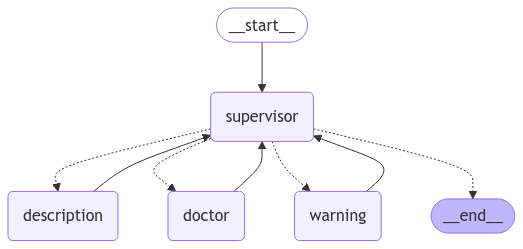

In [172]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [174]:
for s in graph.stream(
    {"messages": [("user", "After a patient fails to respond to Cromolyn Sodium Inhalation Solution for asthama management, what would be the next logical step in treatment?")]}, subgraphs=True
):
    print(s)


next='doctor'
((), {'supervisor': {'next': 'doctor'}})
(('doctor:a97bcf62-29c1-17a9-c8d8-9a80a49c4857',), {'agent': {'messages': [AIMessage(content=[{'text': 'Let me search for information about Cromolyn Sodium and asthma treatment options to provide you with a comprehensive answer.', 'type': 'text'}, {'id': 'toolu_01HECLcgmhNBnJtkymMNnCdf', 'input': {'query': 'Cromolyn Sodium asthma treatment failure next step'}, 'name': 'drugs', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01Ravwq6Pe6ekyWwngq4ERym', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'input_tokens': 445, 'output_tokens': 90}}, id='run-dc60300c-872b-496b-9717-b90456055af4-0', tool_calls=[{'name': 'drugs', 'args': {'query': 'Cromolyn Sodium asthma treatment failure next step'}, 'id': 'toolu_01HECLcgmhNBnJtkymMNnCdf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 445, 'output_tokens': 90, 'total_tokens': 535, 'input_token_details': {}})

In [ ]:
import os
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from typing import Literal
from typing_extensions import TypedDict
from dataclasses import dataclass
from langgraph.graph import MessagesState

# Load environment variables
load_dotenv("./secrets/secrets.env")
groq_api_key = os.getenv("GROQ_API_KEY")

# Initialize the single LLM (ChatGroq)
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.2-3b-preview")

# Define State Schema
@dataclass
class AgentState(MessagesState):
    """State for multi-agent processing."""
    next: str = None

class Router(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH."""
    next: Literal["question_answering", "recommendation", "alternatives", "summarization", "FINISH"]

# Supervisor Node
def supervisor_node(state: AgentState) -> AgentState:
    """Determine the next worker node based on the query and current state."""
    system_prompt = (
        "You are a supervisor responsible for coordinating tasks among the following workers: question_answering, recommendation, alternatives, and summarization. "
        "If the query asks for factual information, select 'question_answering'. "
        "If the query requires advice, select 'recommendation'. "
        "If the query asks for substitutes, select 'alternatives'. "
        "If the query requires summarization, select 'summarization'. "
        "Respond with the name of the next worker, or 'FINISH' if no further tasks are required. "
        "Valid responses are: question_answering, recommendation, alternatives, summarization, FINISH. "
        "IMPORTANT: Respond with only one of these names, without any additional text or explanation."
    )

    messages = [{"role": "system", "content": system_prompt}] + state["messages"]

    try:
        response = llm.invoke(messages)
        print("Supervisor response:", response.content)  # Debugging: Print response

        # Preprocess response
        response_text = response.content.strip().lower()
        response_text = response_text.split(":")[-1].strip()  # Handle verbose responses

        # Validate response
        if response_text in ["question_answering", "recommendation", "alternatives", "summarization", "finish"]:
            state["next"] = response_text
            print(f"Supervisor selected: {state['next']}")  # Debugging: Print selected worker
        else:
            raise ValueError(f"Unexpected response from supervisor: {response_text}")
    except Exception as e:
        print(f"Error in supervisor_node: {e}")
        raise RuntimeError(f"Supervisor failed: {e}")

    return state

# Worker Nodes
def question_answering_node(state: AgentState) -> AgentState:
    """Handles question answering based on user query."""
    print(f"Entering question_answering_node with state: {state}")
    
    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        response = llm.invoke([{"role": "user", "content": f"Answer the following question:\n{query}"}])
        if hasattr(response, "content") and response.content:
            state["messages"].append(HumanMessage(content=response.content, name="question_answering"))
            print(f"Question answered: {response.content}")
        else:
            raise ValueError("Invalid response from LLM in question_answering_node.")
    except Exception as e:
        print(f"Error in question_answering_node: {e}")
        raise RuntimeError(f"Question answering failed: {e}")

    state["next"] = "FINISH"
    return state

def recommendation_node(state: AgentState) -> AgentState:
    """Provides recommendations based on user query using LLM."""
    print(f"Entering recommendation_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        # Query the LLM for a recommendation
        response = llm.invoke([{"role": "user", "content": f"Provide a recommendation based on the following query:\n{query}"}])
        if hasattr(response, "content") and response.content:
            recommendation = response.content.strip()
            state["messages"].append(HumanMessage(content=recommendation, name="recommendation"))
            print(f"Recommendation provided by LLM: {recommendation}")
        else:
            raise ValueError("Invalid or empty response from LLM.")
    except Exception as e:
        print(f"Error in recommendation_node: {e}")
        raise RuntimeError(f"Recommendation generation failed: {e}")

    state["next"] = "FINISH"
    return state


def alternatives_node(state: AgentState) -> AgentState:
    """Suggests alternative medications dynamically using LLM."""
    print(f"Entering alternatives_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        # Query the LLM for alternatives
        response = llm.invoke([{"role": "user", "content": f"Suggest alternative medications for the following query:\n{query}"}])
        if hasattr(response, "content") and response.content:
            alternatives = response.content.strip()
            state["messages"].append(HumanMessage(content=alternatives, name="alternatives"))
            print(f"Alternatives suggested by LLM: {alternatives}")
        else:
            raise ValueError("Invalid or empty response from LLM.")
    except Exception as e:
        print(f"Error in alternatives_node: {e}")
        raise RuntimeError(f"Alternatives generation failed: {e}")

    state["next"] = "FINISH"
    return state


def summarization_node(state: AgentState) -> AgentState:
    """Summarizes the details provided in the user query using LLM."""
    print(f"Entering summarization_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        # Query the LLM for summarization
        response = llm.invoke([{"role": "user", "content": f"Please summarize the following details:\n{query}"}])
        if hasattr(response, "content") and response.content:
            summary = response.content.strip()
            state["messages"].append(HumanMessage(content=summary, name="summarization"))
            print(f"Summary provided by LLM: {summary}")
        else:
            raise ValueError("Invalid or empty response from LLM.")
    except Exception as e:
        print(f"Error in summarization_node: {e}")
        raise RuntimeError(f"Summarization generation failed: {e}")

    state["next"] = "FINISH"
    return state

# Conditional Edge Function
def determine_next_worker(state: AgentState) -> str:
    """Determine the next worker to invoke based on the supervisor's decision."""
    return state.get("next", END)

# Build the State Graph
def build_graph():
    """Constructs the state graph for the workflow."""
    builder = StateGraph(AgentState)
    builder.add_node("supervisor", supervisor_node)
    builder.add_node("question_answering", question_answering_node)
    builder.add_node("recommendation", recommendation_node)
    builder.add_node("alternatives", alternatives_node)
    builder.add_node("summarization", summarization_node)

    builder.add_edge(START, "supervisor")
    builder.add_conditional_edges("supervisor", determine_next_worker)
    return builder.compile()

# Main Function
def main():
    """Executes the workflow with example queries."""
    graph = build_graph()
    queries = [
        "What are the uses of Amoxicillin?",
        "Can I take Ibuprofen if I have stomach ulcers?",
        "Suggest alternatives for Ibuprofen.",
        "Summarize the details of Paracetamol."
    ]

    for query in queries:
        print(f"\nProcessing query: {query}")
        state = AgentState(messages=[{"role": "user", "content": query}])

        # Execute the graph for the current query
        try:
            for result in graph.stream(state, subgraphs=True):
                print(result)
                # Stop the loop after processing the query
                if state.get("next") == "FINISH":
                    print("Workflow complete for this query.\n---")
                    break
        except Exception as e:
            print(f"Error while processing query: {query}. Error: {e}")


if __name__ == "__main__":
    main()

In [152]:
import os
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from langchain.tools.retriever import create_retriever_tool
from langchain_community.vectorstores import Chroma
from langchain_ollama import OllamaEmbeddings
from typing import Literal
from typing_extensions import TypedDict
from dataclasses import dataclass
from langgraph.graph import MessagesState

# Load environment variables
load_dotenv("./secrets/secrets.env")
groq_api_key = os.getenv("GROQ_API_KEY")

# Initialize the LLM
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.2-3b-preview")

# Persistent directory for ChromaDB
PERSIST_DIR = "./db2"

# Initialize Chroma vectorstore
embd = OllamaEmbeddings(model="nomic-embed-text")
# vectorstore = Chroma(persist_directory=PERSIST_DIR, embedding_function=embd)
# retriever = vectorstore.as_retriever()

# Create the retriever tool
retriever_tool = create_retriever_tool(
    retriever,
    name="drugs",
    description="Search and return information about drugs",
)

# Define State Schema
@dataclass
class AgentState(MessagesState):
    """State for multi-agent processing."""
    next: str = None

class Router(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH."""
    next: Literal["retrieval", "question_answering", "recommendation", "alternatives", "summarization", "FINISH"]

# Supervisor Node
def supervisor_node(state: AgentState) -> AgentState:
    """Determine the next worker node based on the query and current state."""
    system_prompt = (
        "You are a supervisor responsible for coordinating tasks among the following workers:  question_answering, recommendation, alternatives, and summarization. "
        # "If the query requires factual retrieval, select 'retrieval'. "
        "If the query asks for substitutes, select 'alternatives'. "
        "If the query requires summarization, select 'summarization'. "
        "Respond with the name of the next worker, or 'FINISH' if no further tasks are required."
    )

    messages = [{"role": "system", "content": system_prompt}] + state["messages"]

    try:
        response = llm.invoke(messages)
        print("Supervisor response:", response.content)  # Debugging: Print response

        # Preprocess response
        response_text = response.content.strip().lower()
        response_text = response_text.split(":")[-1].strip()  # Handle verbose responses

        # Validate response
        if response_text in ["question_answering", "recommendation", "alternatives", "summarization", "finish"]:
            state["next"] = response_text
            print(f"Supervisor selected: {state['next']}")  # Debugging: Print selected worker
        else:
            raise ValueError(f"Unexpected response from supervisor: {response_text}")
    except Exception as e:
        print(f"Error in supervisor_node: {e}")
        raise RuntimeError(f"Supervisor failed: {e}")

    return state

# Retrieval Node
def retrieval_node(state: AgentState) -> AgentState:
    """Handles factual retrieval from the vectorstore."""
    print(f"Entering retrieval_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        # Use the retriever tool for the query
        results = retriever.get_relevant_documents(query)
        # print(results)
        if results:
            content = "\n\n".join([f"Content:\n{res.page_content}\nMetadata: {res.metadata}" for res in results])
            state["messages"].append(HumanMessage(content=content, name="retrieval"))
            print(f"Retrieved documents:\n{content}")
        else:
            state["messages"].append(HumanMessage(content="No relevant documents found.", name="retrieval"))
    except Exception as e:
        print(f"Error in retrieval_node: {e}")
        raise RuntimeError(f"Retrieval failed: {e}")

    # state["next"] = "FINISH"
    return state

# Question Answering Node
def question_answering_node(state: AgentState) -> AgentState:
    """Handles question answering based on user query."""
    print(f"Entering question_answering_node with state: {state}")
    
    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        context = retriever.get_relevant_documents(query)
        response = llm2.invoke([{"role": "user", "content": f"Using the Context {context}, Answer the following question:\n{query}"}])
        if hasattr(response, "content") and response.content:
            state["messages"].append(HumanMessage(content=response.content, name="question_answering"))
            print(f"Question answered: {response.content}")
        else:
            raise ValueError("Invalid response from LLM in question_answering_node.")
    except Exception as e:
        print(f"Error in question_answering_node: {e}")
        raise RuntimeError(f"Question answering failed: {e}")

    state["next"] = "FINISH"
    return state

# Recommendation Node
def recommendation_node(state: AgentState) -> AgentState:
    """Provides recommendations based on user query using LLM."""
    print(f"Entering recommendation_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        context = retriever.get_relevant_documents(query)
        response = llm.invoke([{"role": "user", "content": f"Using the Context {context}, Answer the following question:\n{query}"}])
        if hasattr(response, "content") and response.content:
            recommendation = response.content.strip()
            state["messages"].append(HumanMessage(content=recommendation, name="recommendation"))
            print(f"Recommendation provided by LLM: {recommendation}")
        else:
            raise ValueError("Invalid or empty response from LLM.")
    except Exception as e:
        print(f"Error in recommendation_node: {e}")
        raise RuntimeError(f"Recommendation generation failed: {e}")

    state["next"] = "FINISH"
    return state

# Alternatives Node
def alternatives_node(state: AgentState) -> AgentState:
    """Suggests alternative medications dynamically using LLM."""
    print(f"Entering alternatives_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        context = retriever.get_relevant_documents(query)
        response = llm.invoke([{"role": "user", "content": f"Using the Context {context}, Answer the following question:\n{query}"}])
        if hasattr(response, "content") and response.content:
            alternatives = response.content.strip()
            state["messages"].append(HumanMessage(content=alternatives, name="alternatives"))
            print(f"Alternatives suggested by LLM: {alternatives}")
        else:
            raise ValueError("Invalid or empty response from LLM.")
    except Exception as e:
        print(f"Error in alternatives_node: {e}")
        raise RuntimeError(f"Alternatives generation failed: {e}")

    state["next"] = "FINISH"
    return state

# Summarization Node
def summarization_node(state: AgentState) -> AgentState:
    """Summarizes the details provided in the user query using LLM."""
    print(f"Entering summarization_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        context = retriever.get_relevant_documents(query)
        response = llm.invoke([{"role": "user", "content": f"Using the Context {context}, Answer the following question:\n{query}"}])
        if hasattr(response, "content") and response.content:
            summary = response.content.strip()
            state["messages"].append(HumanMessage(content=summary, name="summarization"))
            print(f"Summary provided by LLM: {summary}")
        else:
            raise ValueError("Invalid or empty response from LLM.")
    except Exception as e:
        print(f"Error in summarization_node: {e}")
        raise RuntimeError(f"Summarization generation failed: {e}")

    state["next"] = "FINISH"
    return state

# Conditional Edge Function
def determine_next_worker(state: AgentState) -> str:
    """Determine the next worker to invoke based on the supervisor's decision."""
    return state.get("next", END)

# Build the State Graph
def build_graph():
    """Constructs the state graph for the workflow."""
    builder = StateGraph(AgentState)
    builder.add_node("supervisor", supervisor_node)
    builder.add_node("retrieval", retrieval_node)
    builder.add_node("question_answering", question_answering_node)
    builder.add_node("recommendation", recommendation_node)
    builder.add_node("alternatives", alternatives_node)
    builder.add_node("summarization", summarization_node)

    builder.add_edge(START, "supervisor")
    builder.add_conditional_edges("supervisor", determine_next_worker)
    return builder.compile()

# Main Function
def main():
    """Executes the workflow with example queries."""
    graph = build_graph()
    queries = [
        "What are the uses of Amoxicillin?",
        # "Aspirin.",
        # "Suggest alternatives for Ibuprofen.",
        # "Summarize the details of Paracetamol."
    ]

    for query in queries:
        print(f"\nProcessing query: {query}")
        state = AgentState(messages=[{"role": "user", "content": query}])

        # Execute the graph for the current query
        try:
            for result in graph.stream(state, subgraphs=True):
                print(result)
                # Stop the loop after processing the query
                if state.get("next") == "FINISH":
                    print("Workflow complete for this query.\n---")
                    break
        except Exception as e:
            print(f"Error while processing query: {query}. Error: {e}")


In [153]:
main()


Processing query: What are the uses of Amoxicillin?
Supervisor response: Since the query asks for substitutes, I will select 'alternatives'. 

Please pass the query to the 'alternatives' worker.
Error in supervisor_node: Unexpected response from supervisor: since the query asks for substitutes, i will select 'alternatives'. 

please pass the query to the 'alternatives' worker.
Error while processing query: What are the uses of Amoxicillin?. Error: Supervisor failed: Unexpected response from supervisor: since the query asks for substitutes, i will select 'alternatives'. 

please pass the query to the 'alternatives' worker.


In [111]:
retriever.get_relevant_documents('aspirin')

[]

In [154]:
import os
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from langchain.tools.retriever import create_retriever_tool
from langchain_community.vectorstores import Chroma
from langchain_ollama import OllamaEmbeddings
from typing import Literal
from typing_extensions import TypedDict
from dataclasses import dataclass
from langgraph.graph import MessagesState

# Load environment variables
load_dotenv("./secrets/secrets.env")
groq_api_key = os.getenv("GROQ_API_KEY")

# Initialize the LLM
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.2-3b-preview")

# Persistent directory for ChromaDB
PERSIST_DIR = "./db2"

# Initialize Chroma vectorstore
embd = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = Chroma(persist_directory=PERSIST_DIR, embedding_function=embd)
retriever = vectorstore.as_retriever()

# Create the retriever tool
retriever_tool = create_retriever_tool(
    retriever,
    name="drugs",
    description="Search and return information about drugs",
)

# Define State Schema
@dataclass
class AgentState(MessagesState):
    """State for multi-agent processing."""
    next: str = None

class Router(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH."""
    next: Literal["retrieval", "question_answering", "recommendation", "alternatives", "summarization", "FINISH"]

# Supervisor Node
def supervisor_node(state: AgentState) -> AgentState:
    """Determine the next worker node based on the query and current state."""
    system_prompt = (
        "You are a supervisor responsible for coordinating tasks among the following workers: retrieval, question_answering, recommendation, alternatives, and summarization. "
        "If the query requires factual retrieval, select 'retrieval'. "
        "If the query asks for substitutes, select 'alternatives'. "
        "If the query requires summarization, select 'summarization'. "
        "Respond with the name of the next worker, or 'FINISH' if no further tasks are required."
    )

    messages = [{"role": "system", "content": system_prompt}] + state["messages"]

    try:
        response = llm.invoke(messages)
        print("Supervisor response:", response.content)  # Debugging: Print response

        # Preprocess response
        response_text = response.content.strip().lower()
        response_text = response_text.split(":")[-1].strip()  # Handle verbose responses

        # Validate response
        if response_text in ["retrieval", "question_answering", "recommendation", "alternatives", "summarization", "finish"]:
            state["next"] = response_text
            print(f"Supervisor selected: {state['next']}")  # Debugging: Print selected worker
        else:
            raise ValueError(f"Unexpected response from supervisor: {response_text}")
    except Exception as e:
        print(f"Error in supervisor_node: {e}")
        raise RuntimeError(f"Supervisor failed: {e}")

    return state

# Worker Nodes
def retrieval_node(state: AgentState) -> AgentState:
    """Handles factual retrieval from the vectorstore."""
    print(f"Entering retrieval_node with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        results = retriever.get_relevant_documents(query)
        if results:
            content = "\n\n".join([f"Content:\n{res.page_content}\nMetadata: {res.metadata}" for res in results])
            state["messages"].append(HumanMessage(content=content, name="retrieval"))
            print(f"Retrieved documents:\n{content}")
        else:
            state["messages"].append(HumanMessage(content="No relevant documents found.", name="retrieval"))
    except Exception as e:
        print(f"Error in retrieval_node: {e}")
        raise RuntimeError(f"Retrieval failed: {e}")

    return state

def generic_worker_node(state: AgentState, task_name: str) -> AgentState:
    """Handles a generic worker task."""
    print(f"Entering {task_name} with state: {state}")

    if state["messages"]:
        query = state["messages"][-1].content
    else:
        query = ""

    try:
        context_docs = retriever.get_relevant_documents(query)
        context = "\n".join([doc.page_content for doc in context_docs])

        response = llm.invoke([{"role": "user", "content": f"Context: {context}\nTask: {task_name}\nQuery: {query}"}])
        if hasattr(response, "content") and response.content:
            state["messages"].append(HumanMessage(content=response.content.strip(), name=task_name))
            print(f"{task_name.capitalize()} result: {response.content.strip()}")
        else:
            raise ValueError(f"Invalid or empty response from LLM in {task_name}.")
    except Exception as e:
        print(f"Error in {task_name}: {e}")
        raise RuntimeError(f"{task_name.capitalize()} failed: {e}")

    state["next"] = "FINISH"
    return state

# Specific Worker Nodes
def question_answering_node(state: AgentState) -> AgentState:
    return generic_worker_node(state, "question_answering")

def recommendation_node(state: AgentState) -> AgentState:
    return generic_worker_node(state, "recommendation")

def alternatives_node(state: AgentState) -> AgentState:
    return generic_worker_node(state, "alternatives")

def summarization_node(state: AgentState) -> AgentState:
    return generic_worker_node(state, "summarization")

# Conditional Edge Function
def determine_next_worker(state: AgentState) -> str:
    """Determine the next worker to invoke based on the supervisor's decision."""
    return state.get("next", END)

# Build the State Graph
def build_graph():
    """Constructs the state graph for the workflow."""
    builder = StateGraph(AgentState)
    builder.add_node("supervisor", supervisor_node)
    builder.add_node("retrieval", retrieval_node)
    builder.add_node("question_answering", question_answering_node)
    builder.add_node("recommendation", recommendation_node)
    builder.add_node("alternatives", alternatives_node)
    builder.add_node("summarization", summarization_node)

    builder.add_edge(START, "supervisor")
    builder.add_conditional_edges("supervisor", determine_next_worker)
    return builder.compile()

# Main Function
def main():
    """Executes the workflow with example queries."""
    graph = build_graph()
    queries = [
        "What are the uses of Amoxicillin?",
        "Retrieve details about Aspirin.",
        "Suggest alternatives for Ibuprofen.",
        "Summarize the details of Paracetamol."
    ]

    for query in queries:
        print(f"\nProcessing query: {query}")
        state = AgentState(messages=[{"role": "user", "content": query}])

        # Execute the graph for the current query
        try:
            for result in graph.stream(state, subgraphs=True):
                print(result)
                if state.get("next") == "FINISH":
                    print("Workflow complete for this query.\n---")
                    break
        except Exception as e:
            print(f"Error while processing query: {query}. Error: {e}")


if __name__ == "__main__":
    main()



Processing query: What are the uses of Amoxicillin?
Supervisor response: retrieval
Supervisor selected: retrieval
((), {'supervisor': {'messages': [HumanMessage(content='What are the uses of Amoxicillin?', additional_kwargs={}, response_metadata={}, id='26877ffa-3791-4f7f-a9e1-f878c54e8a5a')], 'next': 'retrieval'}})
Entering retrieval_node with state: {'messages': [HumanMessage(content='What are the uses of Amoxicillin?', additional_kwargs={}, response_metadata={}, id='26877ffa-3791-4f7f-a9e1-f878c54e8a5a')], 'next': 'retrieval'}
((), {'retrieval': {'messages': [HumanMessage(content='What are the uses of Amoxicillin?', additional_kwargs={}, response_metadata={}, id='26877ffa-3791-4f7f-a9e1-f878c54e8a5a'), HumanMessage(content='No relevant documents found.', additional_kwargs={}, response_metadata={}, name='retrieval')], 'next': 'retrieval'}})

Processing query: Retrieve details about Aspirin.
Supervisor response: Next worker: question_answering
Supervisor selected: question_answering
